In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

In [24]:
df = pd.read_csv("OnlineRetail.csv",on_bad_lines='skip', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Melakukan EDA

In [25]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

,missing_value,%
InvoiceNo,0,0.00
StockCode,0,0.00
Description,1454,0.27
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
CustomerID,135080,24.93
Country,0,0.00


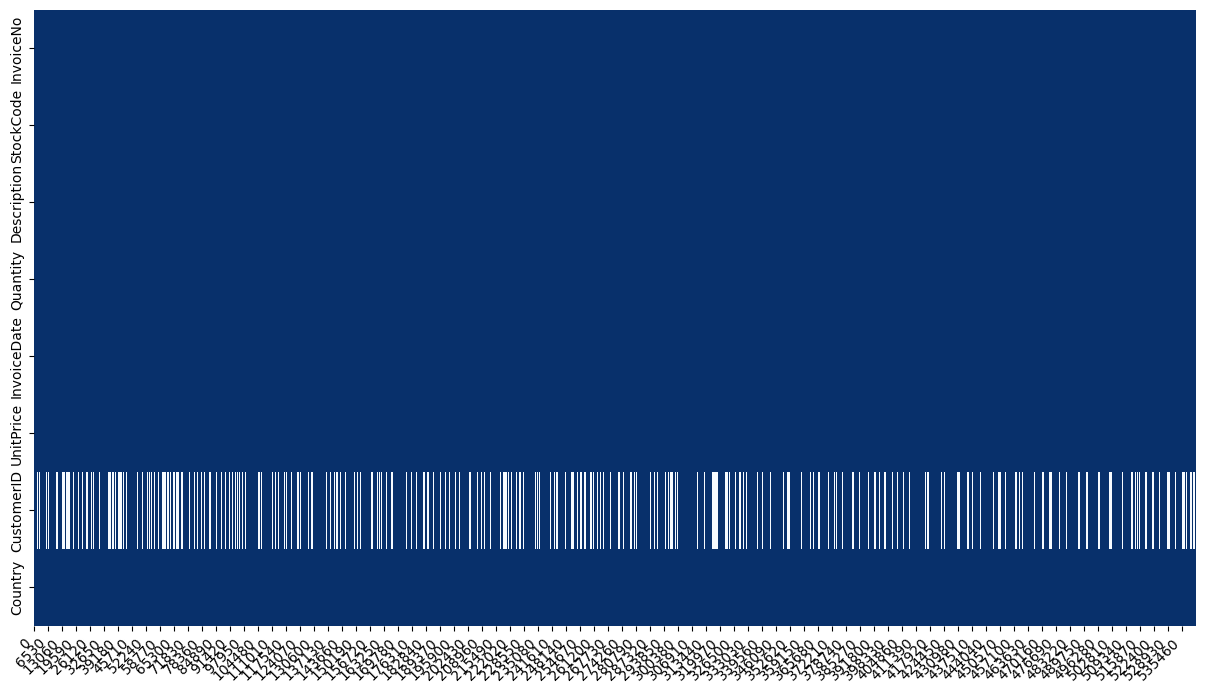

In [26]:
plot_missing_value(df, return_df = True)

In [27]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [28]:
q1_quan = df['Quantity'].quantile(0.25)
q3_quan = df['Quantity'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = Q3 - Q1 = {}'.format(iqr_quan))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_quan))
print('upper bound = Q3 + 1.5 * IQR = {}'.format(ub_quan))

Q1 = 1.0
Q3 = 10.0
IQR = Q3 - Q1 = 9.0
lower bound = Q1 - 1.5 * IQR = -12.5
upper bound = Q3 + 1.5 * IQR = 23.5


In [29]:
q1_unit = df['UnitPrice'].quantile(0.25)
q3_unit = df['UnitPrice'].quantile(0.75)
iqr_unit = q3_unit - q1_unit 
lb_unit = float(q1_unit) - (1.5 * iqr_unit)
ub_unit = float(q3_unit) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = Q3 - Q1 = {}'.format(iqr_unit))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_unit))
print('upper bound = Q1 - 1.5 * IQR = {}'.format(ub_unit))

Q1 = 1.25
Q3 = 4.13
IQR = Q3 - Q1 = 2.88
lower bound = Q1 - 1.5 * IQR = -3.0700000000000003
upper bound = Q1 - 1.5 * IQR = 8.45


Text(0.5, 1.0, 'Quantity x UnitPrice')

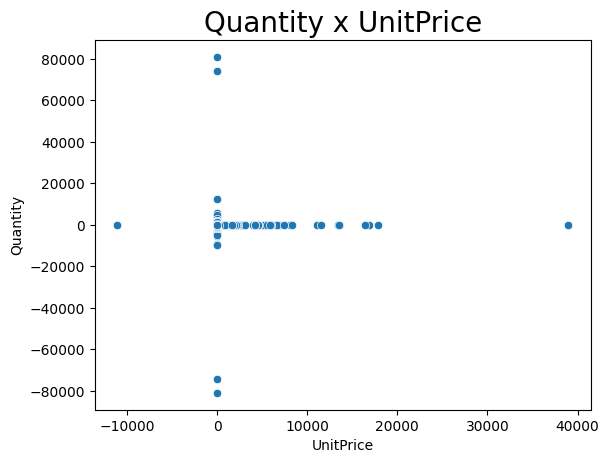

In [30]:
sns.scatterplot(x=df['UnitPrice'], y=df['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20)

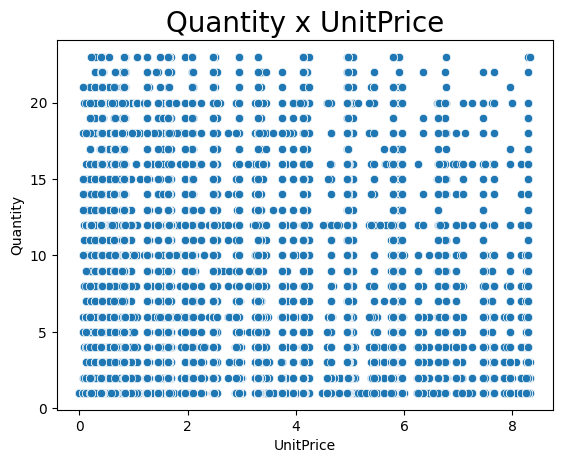

In [31]:
dx = df[df['Quantity']>0] #hilangkan value negatif
dy = df[df['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan - 1.5 * @iqr_quan) <= Quantity <= (@q3_quan + 1.5 * @iqr_quan)')
filtered_unitprice = dy.query('(@q1_unit - 1.5 * @iqr_unit) <= UnitPrice <= (@q3_unit + 1.5 * @iqr_unit)')

sns.scatterplot(x=filtered_unitprice['UnitPrice'], y=filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

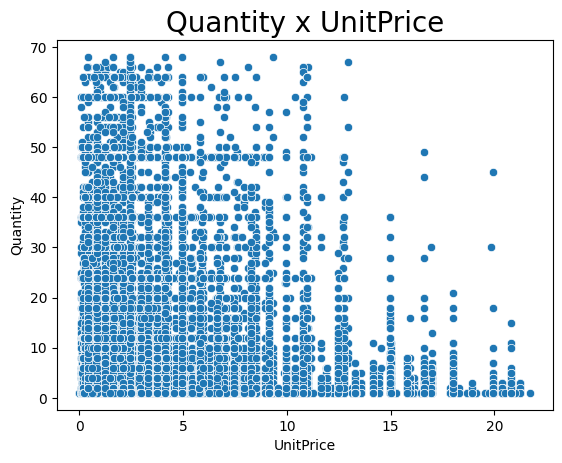

In [32]:
q1_quan_custom = df['Quantity'].quantile(0.5)
q3_quan_custom = df['Quantity'].quantile(0.95)
iqr_quan_custom = q3_quan_custom - q1_quan_custom

q1_unit_custom = df['UnitPrice'].quantile(0.5)
q3_unit_custom = df['UnitPrice'].quantile(0.95)
iqr_unit_custom = q3_unit_custom - q1_unit_custom

dx = df[df['Quantity']>0] #hilangkan value negatif
dy = df[df['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan_custom - 1.5 * @iqr_quan_custom) <= Quantity <= (@q3_quan_custom + 1.5 * @iqr_quan_custom)')
filtered_unitprice = dy.query('(@q1_unit_custom - 1.5 * @iqr_unit_custom) <= UnitPrice <= (@q3_unit_custom + 1.5 * @iqr_unit_custom)')

sns.scatterplot(x=filtered_unitprice['UnitPrice'], y=filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

C:\Users\Natanael\AppData\Local\Temp\ipykernel_8228\162478098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


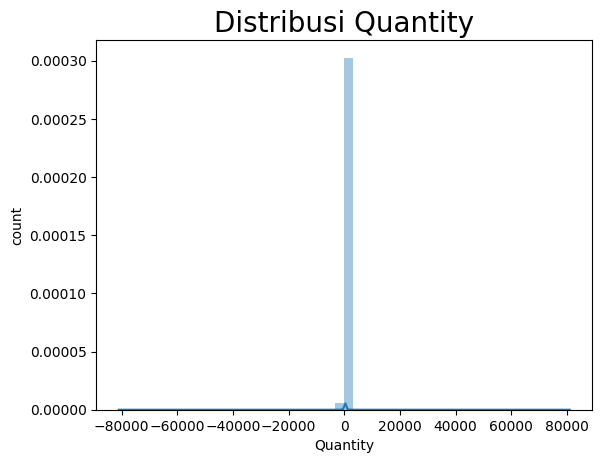

In [33]:
sns.distplot(df['Quantity'])
plt.title('Distribusi Quantity', fontsize = 20)
plt.xlabel('Quantity')
plt.ylabel('count');

C:\Users\Natanael\AppData\Local\Temp\ipykernel_8228\3940843973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


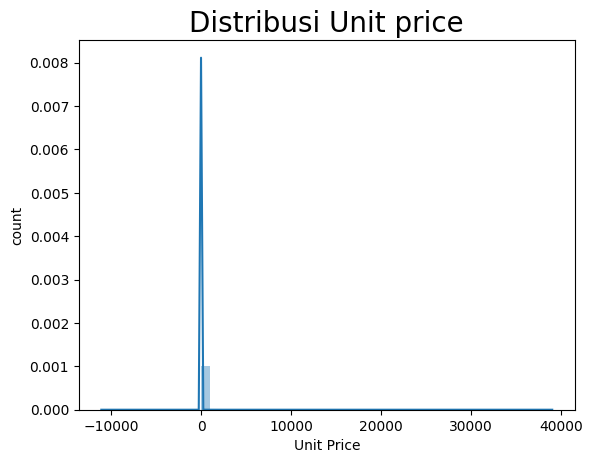

In [34]:
sns.distplot(df['UnitPrice'])
plt.title('Distribusi Unit price', fontsize = 20)
plt.xlabel('Unit Price')
plt.ylabel('count');

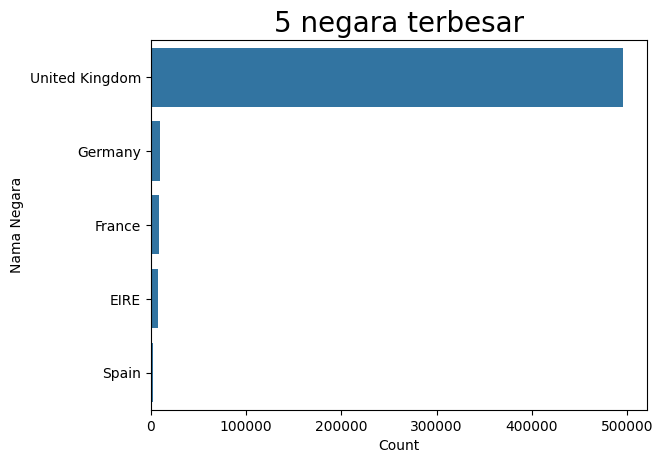

In [35]:
x = df['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, )
plt.title('5 negara terbesar', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Nama Negara');

In [36]:
x = df['Country'].nunique()
print("Terdapat total {} negara".format(x))

country = pd.DataFrame(df['Country'].value_counts()).reset_index()
country.columns = ['Negara', 'Jumlah Transaksi']
country

Terdapat total 38 negara


,Negara,Jumlah Transaksi
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [37]:
df = df[df['Country'] == 'United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [39]:
df = df[~df['CustomerID'].isna()]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [42]:
orders = df.groupby(['InvoiceNo', 'InvoiceDate']).sum().reset_index()
orders.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Revenue
0,536365,2010-12-01 08:26:00,85123A7105384406B84029G84029E2275221730,WHITE HANGING HEART T-LIGHT HOLDERWHITE METAL ...,40,27.37,124950.0,United KingdomUnited KingdomUnited KingdomUnit...,139.12
1,536366,2010-12-01 08:28:00,2263322632,HAND WARMER UNION JACKHAND WARMER RED POLKA DOT,12,3.70,35700.0,United KingdomUnited Kingdom,22.20
2,536367,2010-12-01 08:34:00,8487922745227482274922310849692262322622217542...,ASSORTED COLOUR BIRD ORNAMENTPOPPY'S PLAYHOUSE...,83,58.24,156564.0,United KingdomUnited KingdomUnited KingdomUnit...,278.73
3,536368,2010-12-01 08:34:00,22960229132291222914,JAM MAKING SET WITH JARSRED COAT RACK PARIS FA...,15,19.10,52188.0,United KingdomUnited KingdomUnited KingdomUnit...,70.05
4,536369,2010-12-01 08:35:00,21756,BATH BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,17.85


In [43]:
rfm = summary_data_from_transaction_data(orders, 'CustomerID', 'InvoiceDate', monetary_value_col='Revenue').reset_index()
rfm

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12748.0,26.0,366.0,373.0,56.464615
2,12749.0,0.0,0.0,130.0,0.000000
3,12823.0,4.0,222.0,296.0,363.375000
4,12830.0,0.0,0.0,134.0,0.000000
...,...,...,...,...,...
13313,6131760.0,0.0,0.0,39.0,0.000000
13314,6230432.0,0.0,0.0,16.0,0.000000
13315,7456784.0,0.0,0.0,4.0,0.000000
13316,7513168.0,0.0,0.0,11.0,0.000000


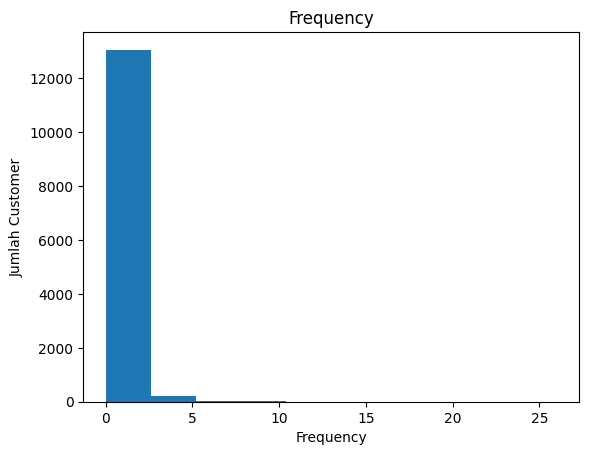

In [44]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer' )
plt.xlabel('Frequency');

In [45]:
rfm = rfm[rfm['frequency']>0]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
1,12748.0,26.0,366.0,373.0,56.464615
3,12823.0,4.0,222.0,296.0,363.375000
6,12843.0,1.0,103.0,168.0,9.950000
7,12845.0,1.0,3.0,270.0,73.500000
9,12875.0,1.0,219.0,362.0,49.470000


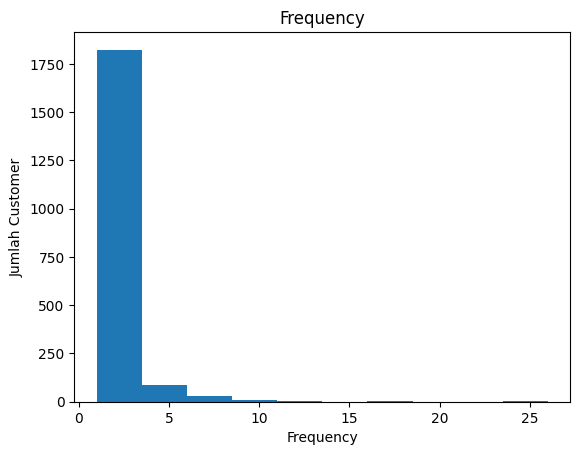

In [46]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Frequency');

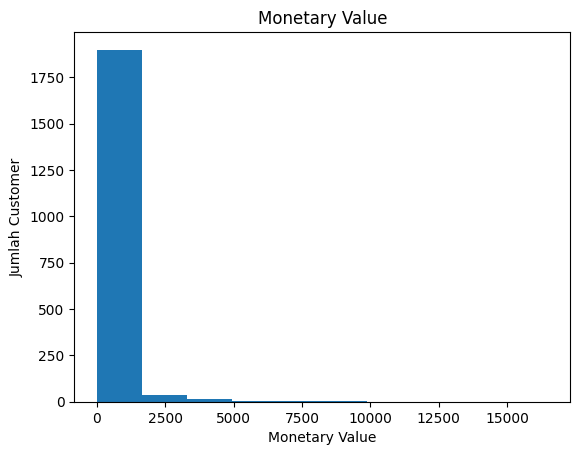

In [47]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Monetary Value');

In [48]:
rfm = rfm[rfm['monetary_value']<2000]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
1,12748.0,26.0,366.0,373.0,56.464615
3,12823.0,4.0,222.0,296.0,363.375000
6,12843.0,1.0,103.0,168.0,9.950000
7,12845.0,1.0,3.0,270.0,73.500000
9,12875.0,1.0,219.0,362.0,49.470000


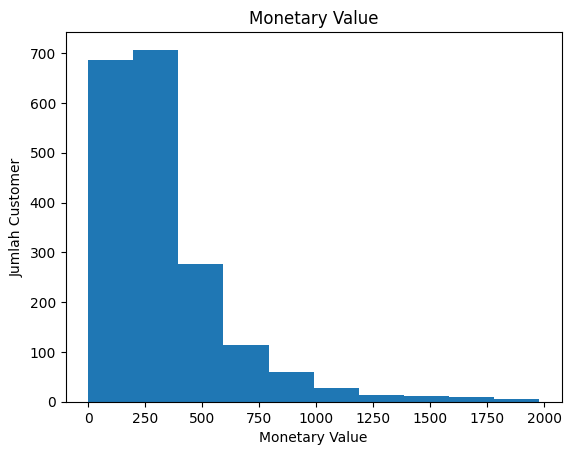

In [49]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Monetary Value');

In [50]:
quartiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quartiles

,CustomerID,frequency,recency,T,monetary_value
0.25,66621.0,1.0,60.0,176.0,142.935
0.50,159818.5,1.0,128.0,256.0,292.555
0.75,292559.5,2.0,221.0,325.0,412.435


In [51]:
def recency_score (data):
    if data <= 60:
        return 1
    elif data <= 128:
        return 2
    elif data <= 221:
        return 3
    else:
        return 4

def frequency_score (data):
    if data <= 1:
        return 1
    elif data <= 1:
        return 2
    elif data <= 2:
        return 3
    else:
        return 4

def monetary_value_score (data):
    if data <= 142.935:
        return 1
    elif data <= 292.555:
        return 2
    elif data <= 412.435:
        return 3
    else:
        return 4

rfm['R'] = rfm['recency'].apply(recency_score )
rfm['F'] = rfm['frequency'].apply(frequency_score)
rfm['M'] = rfm['monetary_value'].apply(monetary_value_score)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1


In [52]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_score
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1,9
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3,11
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1,4
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1,3
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1,5


In [53]:
rfm['label'] = 'Bronze' 
rfm.loc[rfm['RFM_score'] > 4, 'label'] = 'Silver' 
rfm.loc[rfm['RFM_score'] > 6, 'label'] = 'Gold'
rfm.loc[rfm['RFM_score'] > 8, 'label'] = 'Platinum'
rfm.loc[rfm['RFM_score'] > 10, 'label'] = 'Diamond'

rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_score,label
1,12748.0,26.0,366.0,373.0,56.464615,4,4,1,9,Platinum
3,12823.0,4.0,222.0,296.0,363.375000,4,4,3,11,Diamond
6,12843.0,1.0,103.0,168.0,9.950000,2,1,1,4,Bronze
7,12845.0,1.0,3.0,270.0,73.500000,1,1,1,3,Bronze
9,12875.0,1.0,219.0,362.0,49.470000,3,1,1,5,Silver


  Silver  Gold  Bronze  Platinum  Diamond
     658   503     329       290      130


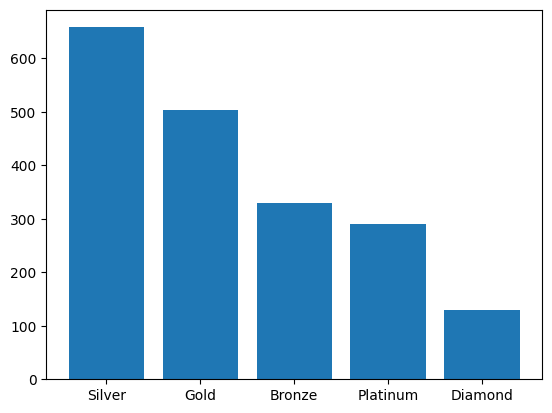

In [54]:
barplot = dict(rfm['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))